### Problem Statement:

### Data Dictionary:

|Feature|Description|
|:-----:|:----------|
|Tomorrow_Direction|**Target variable** <br> 1:  if next day close is higher than current day close <br> 0:  if next day close is equal to current day close (Highly unlikely) <br> -1:  if next day close is lower than current day close|
|Date|Date of current observation|
|Open|Value of 1 Euro in USD at the opening of the current observation date|
|High|Highest value of the exchange rate for the current observation date|
|Low|Lowest value of the exchange rate for the current observation date|
|Close|Value of 1 Euro in USD at the closing of the current observation date|
|Volume|Amount of the asset or security that changed hands over the current date of observation|
|Range| Range refers to the difference between the low and high prices for a security or index over a specific time period|
|ROC| The rate of change (ROC) is the speed at which a variable changes over a specific period of time|
|Standardized| The standard normal distribution, also called the z-distribution, is a special normal distribution where the mean is 0 and the standard deviation is 1|
|Stochastic| A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time|
|MACD| Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 50-period exponential moving average (EMA) from the 20-period EMA|
|ADX| ADX is used to quantify trend strength. ADX calculations are based on a moving average of price range expansion over a given period of time|

<br>

Following a run down of the more advanced metrics:

|Feature|Formula|
|:-----:|:-----:|
|Range |$$\frac{\text{High} - \text{Low}}{\text{Low}}$$     |
|ROC   |$$\frac{\text{Close} - \text{Open}}{\text{Open}}$$     |
|Weekly_ROC|$$\frac{\text{Close} - \text{Open_5_days_ago}}{\text{Open_5_days_ago}}$$|
|Standardized_Range_20|$$\frac{\text{Range} - \text{Mean_of_Last_20_Range}}{\text{Standard_Deviation_of_Last_20_Range}}$$|
|Standardized_ROC_20|$$\frac{\text{ROC} - \text{Mean_of_Last_20_ROC}}{\text{Standard_Deviation_of_Last_20_ROC}}$$|
|Standardized_Weekly_ROC_20|$$\frac{\text{Weekly_ROC} - \text{Mean_of_Last_20_Weekly_ROC}}{\text{Standard_Deviation_of_Last_20_Weekly_ROC}}$$|
|Stochastic_20|$$\frac{\text{Close} - \text{Min_of_Last_20_Low}}{\text{Max_of_Last_20_High} - \text{Min_of_Last_20_Low}}$$|
|Standardized_Close_20|$$\frac{\text{Close} - \text{Mean_of_Last_20_Close}}{\text{Standard_Deviation_of_Last_20_Close}}$$|
|Standardized_Volume_20|$$\frac{\text{Volume} - \text{Mean_of_Last_20_Volume}}{\text{Standard_Deviation_of_Last_20_Volume}}$$|

### Step 1: Data Understanding and Exploration

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV 

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading and printing the first five rows of the dataset
eur_usd_df = pd.read_csv("EURUSD_5000.csv")
eur_usd_df.head()

,Tomorrow_Direction,Date,Open,High,Low,Close,Volume,Range,ROC,Weekly_ROC,Standardized_Range_20,Standardized_ROC_20,Standardized_Weekly_ROC_20,Stochastic_20,Standardized_Close_20,Standardized_Volume_20,Day_of_Week,MACD_20_50,ADX_20
0,-1,2003.06.25,1.1515,1.1625,1.1494,1.1533,11089,0.011397,0.001563,-0.012924,-0.182663,0.262551,-0.759365,0.123077,-1.698919,0.198607,3,0.016158,24.401101
1,1,2003.06.26,1.1534,1.1546,1.1414,1.1418,10675,0.011565,-0.010057,-0.026017,-0.048185,-1.102030,-1.730104,0.007722,-2.317003,-0.523230,4,0.014169,24.948900
2,1,2003.06.27,1.1419,1.1470,1.1399,1.1425,10052,0.006229,0.000525,-0.013300,-1.350905,0.230855,-0.570485,0.048780,-1.912566,-1.550458,5,0.012426,25.802551
3,1,2003.06.30,1.1430,1.1537,1.1400,1.1524,9587,0.012018,0.008224,-0.002251,0.170307,1.221419,0.366398,0.234522,-1.048361,-2.063830,1,0.011419,25.031274
4,-1,2003.07.01,1.1523,1.1613,1.1507,1.1567,9568,0.009212,0.003818,0.004516,-0.596454,0.590436,0.885835,0.315197,-0.660248,-1.805785,2,0.010742,22.799284


In [6]:
# Checking the dimensions of the dataframe
eur_usd_df.shape

(5000, 19)

In [7]:
# Checking for the null values and data types of each column
eur_usd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tomorrow_Direction          5000 non-null   int64  
 1   Date                        5000 non-null   object 
 2   Open                        5000 non-null   float64
 3   High                        5000 non-null   float64
 4   Low                         5000 non-null   float64
 5   Close                       5000 non-null   float64
 6   Volume                      5000 non-null   int64  
 7   Range                       5000 non-null   float64
 8   ROC                         5000 non-null   float64
 9   Weekly_ROC                  5000 non-null   float64
 10  Standardized_Range_20       5000 non-null   float64
 11  Standardized_ROC_20         5000 non-null   float64
 12  Standardized_Weekly_ROC_20  5000 non-null   float64
 13  Stochastic_20               5000 

In [8]:
eur_usd_df.isna().sum()

Tomorrow_Direction            0
Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Volume                        0
Range                         0
ROC                           0
Weekly_ROC                    0
Standardized_Range_20         0
Standardized_ROC_20           0
Standardized_Weekly_ROC_20    0
Stochastic_20                 0
Standardized_Close_20         0
Standardized_Volume_20        0
Day_of_Week                   0
MACD_20_50                    0
ADX_20                        0
dtype: int64

#### Inference: 
1. There are only non-null values in the data.
2. All the features have the correct data types.
3. The target variable ('Tomorrow_Direction') is of dtype int64 but will be considered categorical.  

In [9]:
eur_usd_df.groupby('Tomorrow_Direction')['Tomorrow_Direction'].count()

Tomorrow_Direction
-1    2459
 0      19
 1    2522
Name: Tomorrow_Direction, dtype: int64

#### Inference
We can see how the category '-1' (Downward direction of the exchange) and '1' (Upward direction of the exchange) are fairly balanced, on the other hand '0' (the category representing a constant value) is very rare.
Only 19 occurrences in almost 20 years worth of data represent an anomaly. Keeping this information would turn our problem from a 2 classes to a 3 classes categorization problem. This complication seems unreasonable for an event so rare. For this reason we will consider it as an outlier and remove these 19 data-points from our dataset.

In [10]:
eur_usd_df = eur_usd_df[eur_usd_df.Tomorrow_Direction != 0]
eur_usd_df.shape

(4981, 19)

In [11]:
# Checking for ouliers in the data
eur_usd_df.describe(percentiles=[.01, .25, .50, .75, .99])

,Tomorrow_Direction,Open,High,Low,Close,Volume,Range,ROC,Weekly_ROC,Standardized_Range_20,Standardized_ROC_20,Standardized_Weekly_ROC_20,Stochastic_20,Standardized_Close_20,Standardized_Volume_20,Day_of_Week,MACD_20_50,ADX_20
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.012648,1.246302,1.251728,1.241005,1.246322,58653.982333,0.008606,0.000034,-0.000024,-0.011949,-0.000378,0.000871,0.491821,-0.006525,-0.013717,2.999598,-0.000397,26.146781
std,1.000020,0.122904,0.123645,0.121972,0.122886,44686.769758,0.004681,0.005804,0.012771,0.986298,0.970539,1.091200,0.307432,1.287056,1.105759,1.413929,0.013299,10.318842
min,-1.000000,0.990310,0.994430,0.981270,0.983720,1.000000,0.000000,-0.026529,-0.065261,-2.404827,-3.598988,-3.384675,0.000000,-3.140685,-3.879980,1.000000,-0.061788,8.493487
1%,-1.000000,1.024060,1.027656,1.017540,1.022916,4917.200000,0.002348,-0.015577,-0.032923,-1.690659,-2.212477,-2.419186,0.010215,-2.495046,-2.626391,1.000000,-0.040453,11.614175
25%,-1.000000,1.136910,1.141470,1.132700,1.136890,13112.000000,0.005483,-0.003178,-0.007506,-0.720333,-0.648396,-0.780612,0.207145,-1.085375,-0.767990,2.000000,-0.007198,18.424528
50%,1.000000,1.232760,1.238100,1.226670,1.232610,53078.000000,0.007544,0.000066,0.000081,-0.183578,0.011982,0.015121,0.477528,-0.022924,-0.029159,3.000000,0.000333,23.950557
75%,1.000000,1.335180,1.339860,1.328630,1.335400,83107.000000,0.010572,0.003244,0.007750,0.565991,0.639866,0.795691,0.775161,1.091672,0.706061,4.000000,0.007609,31.346321
99%,1.000000,1.566680,1.575060,1.558600,1.566660,182602.000000,0.025092,0.015034,0.029770,2.897757,2.303048,2.326552,0.986754,2.483336,2.732283,5.000000,0.028757,58.610048
max,1.000000,1.599500,1.603800,1.586600,1.599700,308719.000000,0.047336,0.034983,0.106144,4.073759,3.517669,3.331814,1.000000,3.454867,4.112535,5.000000,0.036040,67.820681


#### Inference: 
It's possible to see some outliers are present in the dataset, we will proceed to calculate the amount.

In [12]:
dict_outliers = {}
for col in eur_usd_df.columns:
    if col != 'Date':
        # Calculating interquartile range
        q25 = eur_usd_df[col].quantile(0.25)
        q75 = eur_usd_df[col].quantile(0.75)
        iqr = q75 - q25

        # Calculating the outlier cutoff
        cut_off = iqr * 1.5
        upper = q75 + cut_off
        lower = q25 - cut_off

        # Identify outliers
        outliers_up = eur_usd_df[eur_usd_df[col]>upper]
        outliers_down = eur_usd_df[eur_usd_df[col]<lower]
        # Number of records that are outliers
        dict_outliers.update({col:{'outliers_up': len(outliers_up),'outliers_down': len(outliers_down)}})
    
out_df = pd.DataFrame(dict_outliers)
out_df.T

,outliers_up,outliers_down
Tomorrow_Direction,0,0
Open,0,0
High,0,0
Low,0,0
Close,0,0
Volume,40,0
Range,192,0
ROC,89,100
Weekly_ROC,45,77
Standardized_Range_20,99,0


#### Inference
The number of outliers is quite high, this is due to the nature of the data we are evaluating and after careful consideration we decided to not remove them and consider them as a normal part of the informations we are processing.

We can also observe that unlike the other features 'Volume' is outstanding for the high values it assumes. We proceed to normalize it.

In [13]:
# Normalizing Volume feature
eur_usd_df["Volume"]=(eur_usd_df["Volume"]-eur_usd_df["Volume"].min())/(eur_usd_df["Volume"].max()-eur_usd_df["Volume"].min())

In [14]:
# Dropping Date column as it is not useful for further analisys
eur_usd_df.drop('Date', inplace=True, axis=1)
eur_usd_df

,Tomorrow_Direction,Open,High,Low,Close,Volume,Range,ROC,Weekly_ROC,Standardized_Range_20,Standardized_ROC_20,Standardized_Weekly_ROC_20,Stochastic_20,Standardized_Close_20,Standardized_Volume_20,Day_of_Week,MACD_20_50,ADX_20
0,-1,1.15150,1.16250,1.14940,1.15330,0.035916,0.011397,0.001563,-0.012924,-0.182663,0.262551,-0.759365,0.123077,-1.698919,0.198607,3,0.016158,24.401101
1,1,1.15340,1.15460,1.14140,1.14180,0.034575,0.011565,-0.010057,-0.026017,-0.048185,-1.102030,-1.730104,0.007722,-2.317003,-0.523230,4,0.014169,24.948900
2,1,1.14190,1.14700,1.13990,1.14250,0.032557,0.006229,0.000525,-0.013300,-1.350905,0.230855,-0.570485,0.048780,-1.912566,-1.550458,5,0.012426,25.802551
3,1,1.14300,1.15370,1.14000,1.15240,0.031051,0.012018,0.008224,-0.002251,0.170307,1.221419,0.366398,0.234522,-1.048361,-2.063830,1,0.011419,25.031274
4,-1,1.15230,1.16130,1.15070,1.15670,0.030989,0.009212,0.003818,0.004516,-0.596454,0.590436,0.885835,0.315197,-0.660248,-1.805785,2,0.010742,22.799284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.99781,1.00181,0.99556,0.99966,0.290767,0.006278,0.001854,-0.000170,-1.235903,0.385388,0.262369,0.397125,0.158557,-1.697365,4,-0.010682,18.569969
4996,1,0.99975,1.00367,0.99444,1.00129,0.330742,0.009282,0.001540,-0.008791,-0.505310,0.280573,-0.559334,0.445942,0.525663,-0.988528,5,-0.010319,17.601942
4997,-1,1.00043,1.00291,0.99659,1.00240,0.254601,0.006342,0.001969,-0.009555,-1.180031,0.278174,-0.730872,0.479185,0.678504,-2.290141,1,-0.009903,16.726108
4998,-1,1.00197,1.00506,0.99549,0.99711,0.324549,0.009613,-0.004850,0.000371,-0.294366,-0.926199,0.150651,0.320755,-0.427044,-0.862711,2,-0.009800,16.589147


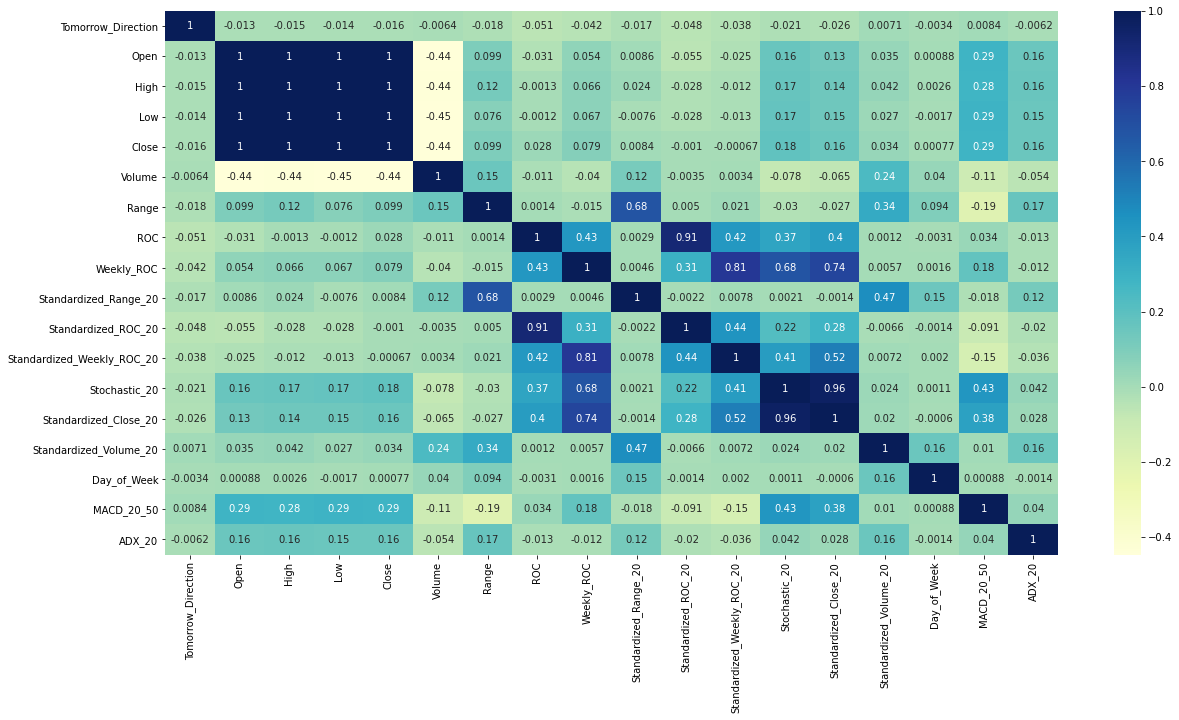

In [15]:
# Plotting correlations on a heatmap
plt.figure(figsize=(20,10))
cor = eur_usd_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Inference:
As shown in the heatmap, following columns have high correlation - Open, High, Low, Close, ROC, Weekly_ROC, Stochastic_20, to simplify the model we will perform a drop of the highly correlated features, paying attention to keep at least one of the clique of features (i.e. The features 'Open', 'High', 'Low', 'Close' show high correlation between each other but not with other features, hence we will mantain 'Close' to avoid losing information from that group of features entirely).

In [16]:
# Dropping highly correlated features
eur_usd_df.drop(['Open', 'High', 'Low', 'ROC', 'Weekly_ROC', 'Stochastic_20'], inplace=True, axis=1)
eur_usd_df

,Tomorrow_Direction,Close,Volume,Range,Standardized_Range_20,Standardized_ROC_20,Standardized_Weekly_ROC_20,Standardized_Close_20,Standardized_Volume_20,Day_of_Week,MACD_20_50,ADX_20
0,-1,1.15330,0.035916,0.011397,-0.182663,0.262551,-0.759365,-1.698919,0.198607,3,0.016158,24.401101
1,1,1.14180,0.034575,0.011565,-0.048185,-1.102030,-1.730104,-2.317003,-0.523230,4,0.014169,24.948900
2,1,1.14250,0.032557,0.006229,-1.350905,0.230855,-0.570485,-1.912566,-1.550458,5,0.012426,25.802551
3,1,1.15240,0.031051,0.012018,0.170307,1.221419,0.366398,-1.048361,-2.063830,1,0.011419,25.031274
4,-1,1.15670,0.030989,0.009212,-0.596454,0.590436,0.885835,-0.660248,-1.805785,2,0.010742,22.799284
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.99966,0.290767,0.006278,-1.235903,0.385388,0.262369,0.158557,-1.697365,4,-0.010682,18.569969
4996,1,1.00129,0.330742,0.009282,-0.505310,0.280573,-0.559334,0.525663,-0.988528,5,-0.010319,17.601942
4997,-1,1.00240,0.254601,0.006342,-1.180031,0.278174,-0.730872,0.678504,-2.290141,1,-0.009903,16.726108
4998,-1,0.99711,0.324549,0.009613,-0.294366,-0.926199,0.150651,-0.427044,-0.862711,2,-0.009800,16.589147


### Step 2: Data Preparation

In [17]:
# Putting feature variables to X
X = eur_usd_df.drop('Tomorrow_Direction', axis=1)
X.head()

,Close,Volume,Range,Standardized_Range_20,Standardized_ROC_20,Standardized_Weekly_ROC_20,Standardized_Close_20,Standardized_Volume_20,Day_of_Week,MACD_20_50,ADX_20
0,1.1533,0.035916,0.011397,-0.182663,0.262551,-0.759365,-1.698919,0.198607,3,0.016158,24.401101
1,1.1418,0.034575,0.011565,-0.048185,-1.102030,-1.730104,-2.317003,-0.523230,4,0.014169,24.948900
2,1.1425,0.032557,0.006229,-1.350905,0.230855,-0.570485,-1.912566,-1.550458,5,0.012426,25.802551
3,1.1524,0.031051,0.012018,0.170307,1.221419,0.366398,-1.048361,-2.063830,1,0.011419,25.031274
4,1.1567,0.030989,0.009212,-0.596454,0.590436,0.885835,-0.660248,-1.805785,2,0.010742,22.799284


In [18]:
# Putting response variable to y
y = eur_usd_df['Tomorrow_Direction']
y.head()

0   -1
1    1
2    1
3    1
4   -1
Name: Tomorrow_Direction, dtype: int64

In [19]:
# Splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Step 3: Model Building - Logistic Regression

In [20]:
# Logistic regression model
logmodel = LogisticRegression(random_state = 42)

In [21]:
# Fitting the logistic regression model on training dataset
logmodel.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [22]:
# Predicting the test set results
y_pred = logmodel.predict(X_test)
y_pred

array([ 1, -1, -1, ..., -1,  1, -1], dtype=int64)

In [23]:
# Calculating the accuracy of logistic regression model
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.516


In [24]:
# Computing Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[293 443]
 [280 479]]


#### Inference:
The result is telling us that we have 293+479 correct predictions and 443+280 incorrect predictions.

In [25]:
# Computing precision, recall, F-measure and support
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.51      0.40      0.45       736
           1       0.52      0.63      0.57       759

    accuracy                           0.52      1495
   macro avg       0.52      0.51      0.51      1495
weighted avg       0.52      0.52      0.51      1495



#### Inference:
1. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
2. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
3. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
4. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
5. Of the entire test set, 51.6% of the Tomorrow's Direction were correctly predicted.

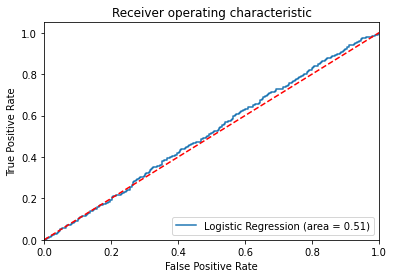

In [26]:
# Plotting a ROC Curve
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Inference:
1. ROC curve is another commonly used tool for binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

### Step 4: Model Building - Decision Tree

In [27]:
# Decision Tree Classifier model
DT_clf = DecisionTreeClassifier(random_state = 42)

In [28]:
# Fitting the Decision Tree Classifier model on training dataset
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Predicting the test set results
DTC_predictions = DT_clf.predict(X_test)
DTC_predictions

array([ 1,  1, -1, ..., -1,  1, -1], dtype=int64)

In [30]:
# Calculating the accuracy of Decision Tree Classifier model
print('Accuracy of Decision Tree Classifier model on test set: {:.3f}'.format(DT_clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier model on test set: 0.516


In [31]:
# Computing Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, DTC_predictions)
print(confusion_matrix)

[[355 381]
 [342 417]]


#### Inference:
The result is telling us that we have 355 + 417 correct predictions and 381 + 342 incorrect predictions.

In [32]:
# Computing precision, recall, F-measure and support
print(metrics.classification_report(y_test, DTC_predictions))

              precision    recall  f1-score   support

          -1       0.51      0.48      0.50       736
           1       0.52      0.55      0.54       759

    accuracy                           0.52      1495
   macro avg       0.52      0.52      0.52      1495
weighted avg       0.52      0.52      0.52      1495



#### Inference:
1. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
2. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
3. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
4. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
5. Of the entire test set, 51.6% of the Tomorrow's Direction were correctly predicted.

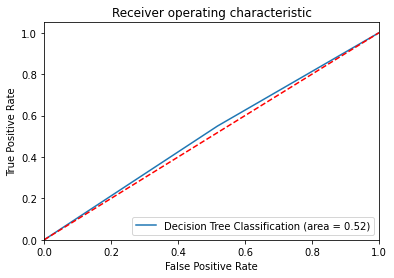

In [33]:
# Plotting a ROC Curve
DTC_roc_auc = metrics.roc_auc_score(y_test, DTC_predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, DT_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classification (area = %0.2f)' % DTC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Inference:
1. ROC curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
2. This model performed almost exactly like a random classifier.

### Step 5: Model Building - Random Forest

In [34]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators=10, random_state = 42)

In [35]:
# Fitting the Random Forest Classifier model on training dataset
RF_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [36]:
# Predicting the test set results
RFC_pred = RF_clf.predict(X_test)
RFC_pred

array([ 1, -1, -1, ..., -1,  1, -1], dtype=int64)

In [37]:
# Calculating the accuracy of Random Forest Classifier model
print('Accuracy of Random Forest Classifier model on test set: {:.3f}'.format(RF_clf.score(X_test, y_test)))

Accuracy of Random Forest Classifier model on test set: 0.530


In [38]:
# Computing Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, RFC_pred)
print(confusion_matrix)

[[452 284]
 [419 340]]


#### Inference:
The result is telling us that we have 452 + 340 correct predictions and 284 + 419 incorrect predictions.

In [39]:
# Computing precision, recall, F-measure and support
print(metrics.classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

          -1       0.52      0.61      0.56       736
           1       0.54      0.45      0.49       759

    accuracy                           0.53      1495
   macro avg       0.53      0.53      0.53      1495
weighted avg       0.53      0.53      0.53      1495



#### Inference:
1. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
2. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
3. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
4. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
5. Of the entire test set, 53% of the Tomorrow's Direction were correctly predicted.

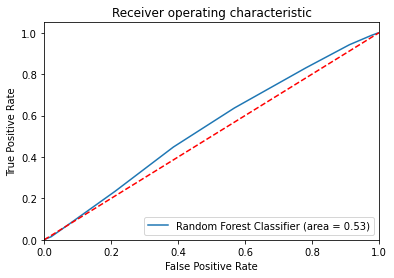

In [40]:
# Plotting a ROC Curve
RFC_roc_auc = metrics.roc_auc_score(y_test, RFC_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, RF_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % RFC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Inference:
1. ROC curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

### Step 6: Model Building - SGD

In [41]:
# SGD Classifier model
model = SGDClassifier(loss = 'hinge', max_iter=1000, tol=1e-3, random_state = 42) # tol: the stopping criterion

In [42]:
# Fitting the SGD Classifier model on training dataset
clf = model.fit(X_train, y_train)
calibrator = CalibratedClassifierCV(clf, cv='prefit')
SGD_model = calibrator.fit(X_train, y_train)

In [43]:
# Predicting the test set results
SGD_pred = SGD_model.predict(X_test)
SGD_pred

array([ 1, -1, -1, ..., -1,  1, -1], dtype=int64)

In [44]:
# Calculating the accuracy of SGD Classifier model
print('Accuracy of SGD Classifier model on test set: {:.3f}'.format(SGD_model.score(X_test, y_test)))

Accuracy of SGD Classifier model on test set: 0.509


In [45]:
# Computing Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, SGD_pred)
print(confusion_matrix)

[[307 429]
 [305 454]]


#### Inference:
The result is telling us that we have 307 + 454 correct predictions and 429 + 305 incorrect predictions.

In [46]:
# Computing precision, recall, F-measure and support
print(metrics.classification_report(y_test, SGD_pred))

              precision    recall  f1-score   support

          -1       0.50      0.42      0.46       736
           1       0.51      0.60      0.55       759

    accuracy                           0.51      1495
   macro avg       0.51      0.51      0.50      1495
weighted avg       0.51      0.51      0.50      1495



#### Inference:
1. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
2. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
3. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
4. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
5. Of the entire test set, 50.9% of the Tomorrow's Direction were correctly predicted.

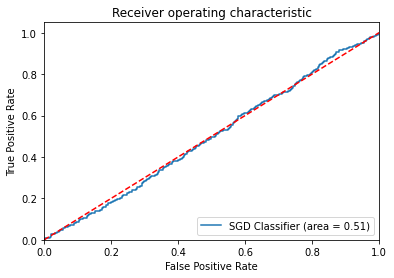

In [47]:
# Plotting a ROC Curve
SGD_roc_auc = metrics.roc_auc_score(y_test, SGD_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, SGD_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SGD Classifier (area = %0.2f)' % SGD_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Inference:
1. ROC curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
2. This model performed almost exactly like a random classifier.

### Step 7: Model Building - SVM

In [48]:
# SVM Classifier model
SVM_model = SVC(probability=True, C= 1, gamma= 0.01, kernel= 'rbf', random_state = 42) # C: regularization parameter
                                                               # Gamma: kernel coeff.,the ‘spread’ of the kernel/decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad.

In [49]:
# Fitting the SVM Classifier model on training dataset
SVM_model.fit(X_train,y_train)

SVC(C=1, gamma=0.01, probability=True, random_state=42)

In [50]:
# Predicting the test set results
SVM_pred = SVM_model.predict(X_test)
SVM_pred

array([ 1, -1,  1, ..., -1,  1,  1], dtype=int64)

In [51]:
# Calculating the accuracy of SVM Classifier model
print('Accuracy of SVM Classifier model on test set: {:.3f}'.format(SVM_model.score(X_test, y_test)))

Accuracy of SVM Classifier model on test set: 0.515


In [52]:
# Computing Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, SVM_pred)
print(confusion_matrix)

[[296 440]
 [285 474]]


#### Inference:
The result is telling us that we have 296 + 474 correct predictions and 440 + 285 incorrect predictions.

In [53]:
# Computing precision, recall, F-measure and support
print(metrics.classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

          -1       0.51      0.40      0.45       736
           1       0.52      0.62      0.57       759

    accuracy                           0.52      1495
   macro avg       0.51      0.51      0.51      1495
weighted avg       0.51      0.52      0.51      1495



#### Inference:
1. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
2. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
3. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
4. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
5. Of the entire test set, 51.5% of the Tomorrow's Direction were correctly predicted.

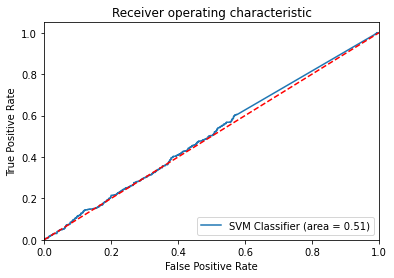

In [54]:
# Plotting a ROC Curve
SVM_roc_auc = metrics.roc_auc_score(y_test, SVM_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, SVM_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM Classifier (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Inference:
1. ROC curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [55]:
# Comparing accuracy of different models
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SGD", "SVM"]
accuracy_scores = ["{:.3f}".format(logmodel.score(X_test, y_test)), "{:.3f}".format(DT_clf.score(X_test, y_test)), "{:.3f}".format(RF_clf.score(X_test, y_test)), "{:.3f}".format(SGD_model.score(X_test, y_test)), "{:.3f}".format(SVM_model.score(X_test, y_test))]
models_comparison_df = pd.DataFrame(
        {'Model': models, 
         'Accuracy Score': accuracy_scores})
models_comparison_df                       

,Model,Accuracy Score
0,Logistic Regression,0.516
1,Decision Tree,0.516
2,Random Forest,0.530
3,SGD,0.509
4,SVM,0.515


### Step 8: Tuning the parameters of models using GridSearchCV

##### Logistic regression model

In [56]:
# Grid search cross validation
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
grid_log_reg = GridSearchCV(LogisticRegression(random_state = 42),params,cv=10)
grid_log_reg.fit(X_train, y_train)
grid_log_reg.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [57]:
# logistic regression best model
logmodel_gs = grid_log_reg.best_estimator_

In [58]:
# Calculating the accuracy of logistic regression model
print('Accuracy of logistic regression classifier on test set after tuning the param: {:.3f}'.format(logmodel_gs.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set after tuning the param: 0.506


#### Inference
In this particular instance the parameters suggested by GridSearch did not improve the model.

##### Decision Tree model

In [59]:
# Grid search cross validation
params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
grid_DT = GridSearchCV(DecisionTreeClassifier(random_state= 42), params, cv=5, verbose=True)
grid_DT.fit(X_train, y_train)
grid_DT.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    3.1s finished


{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto'}

In [60]:
# Decision Tree best model
DT_gs = grid_DT.best_estimator_

In [61]:
# Calculating the accuracy of Decision Tree model
print('Accuracy of Decision Tree classifier on test set after tuning the param: {:.3f}'.format(DT_gs.score(X_test, y_test)))


Accuracy of Decision Tree classifier on test set after tuning the param: 0.514


#### Inference
The decision tree classifier does not show improvement in accuracy after parameters tuning using GridsearchCV

#### Random Forest Model

In [62]:
# Grid search cross validation
params = { 
    'n_estimators': [10, 100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}
grid_RF = GridSearchCV(RandomForestClassifier(random_state = 42), params, cv=5, verbose=True)
grid_RF.fit(X_train, y_train)
grid_RF.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  6.2min finished


{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 500}

In [63]:
# Random Forest best model
RF_gs = grid_RF.best_estimator_

In [64]:
# Calculating the accuracy of Random Forest model
print('Accuracy of Random Forest classifier on test set after tuning the param: {:.3f}'.format(RF_gs.score(X_test, y_test)))


Accuracy of Random Forest classifier on test set after tuning the param: 0.530


#### Inference
The parameter tuning shows the same performance of the Random Forest Classifier using GridsearchCV

#### SGD Model

In [65]:
# Grid search cross validation
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}
grid_SGD = GridSearchCV(SGDClassifier(max_iter=1000, random_state = 42), params, cv=5, verbose=True)
grid_SGD.fit(X_train, y_train)
grid_SGD.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    3.9s finished


{'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}

In [66]:
# SGD best model
SGD_gs = grid_SGD.best_estimator_

In [67]:
# Calculating the accuracy of SGD model
print('Accuracy of SGD on test set after tuning the param: {:.3f}'.format(SGD_gs.score(X_test, y_test)))


Accuracy of SGD on test set after tuning the param: 0.516


#### Inference
We can observe parameter tuning improved the performance of the SGD model.

#### SVM Model

In [68]:
# Grid search cross validation
params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid_SVM = GridSearchCV(SVC(random_state = 42), params, verbose=True, cv=5)
grid_SVM.fit(X_train, y_train)
grid_SVM.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   42.3s finished


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [69]:
# SVM best model
SVM_gs = grid_SVM.best_estimator_

In [70]:
# Calculating the accuracy of SGD model
print('Accuracy of SVM on test set after tuning the param: {:.3f}'.format(SVM_gs.score(X_test, y_test)))


Accuracy of SVM on test set after tuning the param: 0.505


Here we can observe the gridsearchcv degraded the peroformance of SVM model.

In [71]:
# Comparing accuracy of different models
acc = pd.Series(["{:.3f}".format(logmodel_gs.score(X_test, y_test)), 
                "{:.3f}".format(DT_gs.score(X_test, y_test)), 
                "{:.3f}".format(RF_gs.score(X_test, y_test)), 
                "{:.3f}".format(SGD_gs.score(X_test, y_test)), 
                "{:.3f}".format(SVM_gs.score(X_test, y_test))])

models_comparison_df["Accuracy Score after Tuning"] = acc

models_comparison_df

,Model,Accuracy Score,Accuracy Score after Tuning
0,Logistic Regression,0.516,0.506
1,Decision Tree,0.516,0.514
2,Random Forest,0.530,0.530
3,SGD,0.509,0.516
4,SVM,0.515,0.505


#### Inference
Only 1 out of 5 models improved the performance thanks to the parameters tuning, unfortunately the accuracy is still very low.

### Step 9: Features selection and models re-evaluation

In [72]:
eur_usd_df_2 = eur_usd_df.copy()
eur_usd_df_2

,Tomorrow_Direction,Close,Volume,Range,Standardized_Range_20,Standardized_ROC_20,Standardized_Weekly_ROC_20,Standardized_Close_20,Standardized_Volume_20,Day_of_Week,MACD_20_50,ADX_20
0,-1,1.15330,0.035916,0.011397,-0.182663,0.262551,-0.759365,-1.698919,0.198607,3,0.016158,24.401101
1,1,1.14180,0.034575,0.011565,-0.048185,-1.102030,-1.730104,-2.317003,-0.523230,4,0.014169,24.948900
2,1,1.14250,0.032557,0.006229,-1.350905,0.230855,-0.570485,-1.912566,-1.550458,5,0.012426,25.802551
3,1,1.15240,0.031051,0.012018,0.170307,1.221419,0.366398,-1.048361,-2.063830,1,0.011419,25.031274
4,-1,1.15670,0.030989,0.009212,-0.596454,0.590436,0.885835,-0.660248,-1.805785,2,0.010742,22.799284
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.99966,0.290767,0.006278,-1.235903,0.385388,0.262369,0.158557,-1.697365,4,-0.010682,18.569969
4996,1,1.00129,0.330742,0.009282,-0.505310,0.280573,-0.559334,0.525663,-0.988528,5,-0.010319,17.601942
4997,-1,1.00240,0.254601,0.006342,-1.180031,0.278174,-0.730872,0.678504,-2.290141,1,-0.009903,16.726108
4998,-1,0.99711,0.324549,0.009613,-0.294366,-0.926199,0.150651,-0.427044,-0.862711,2,-0.009800,16.589147


After feeding the dataset to a feature selctor tool developed by us the features considered as best by the FeatureSelector are the following: 'Standardized_Weekly_ROC_20', 'Standardized_Range_20', 'Volume', 'Standardized_Volume_20', 'Standardized_ROC_20', 'Close', 'MACD_20_50'. 
As a consequence we will re-evaluate all the models only taking into account the above mentioned features.

In [73]:
# Dropping some features 
features_to_keep = ['Tomorrow_Direction', 'Standardized_Weekly_ROC_20', 'Standardized_Range_20', 'Volume',
       'Standardized_Volume_20', 'Standardized_ROC_20', 'Close', 'MACD_20_50']
eur_usd_df_2 = eur_usd_df_2[features_to_keep]
eur_usd_df_2

,Tomorrow_Direction,Standardized_Weekly_ROC_20,Standardized_Range_20,Volume,Standardized_Volume_20,Standardized_ROC_20,Close,MACD_20_50
0,-1,-0.759365,-0.182663,0.035916,0.198607,0.262551,1.15330,0.016158
1,1,-1.730104,-0.048185,0.034575,-0.523230,-1.102030,1.14180,0.014169
2,1,-0.570485,-1.350905,0.032557,-1.550458,0.230855,1.14250,0.012426
3,1,0.366398,0.170307,0.031051,-2.063830,1.221419,1.15240,0.011419
4,-1,0.885835,-0.596454,0.030989,-1.805785,0.590436,1.15670,0.010742
...,...,...,...,...,...,...,...,...
4995,1,0.262369,-1.235903,0.290767,-1.697365,0.385388,0.99966,-0.010682
4996,1,-0.559334,-0.505310,0.330742,-0.988528,0.280573,1.00129,-0.010319
4997,-1,-0.730872,-1.180031,0.254601,-2.290141,0.278174,1.00240,-0.009903
4998,-1,0.150651,-0.294366,0.324549,-0.862711,-0.926199,0.99711,-0.009800


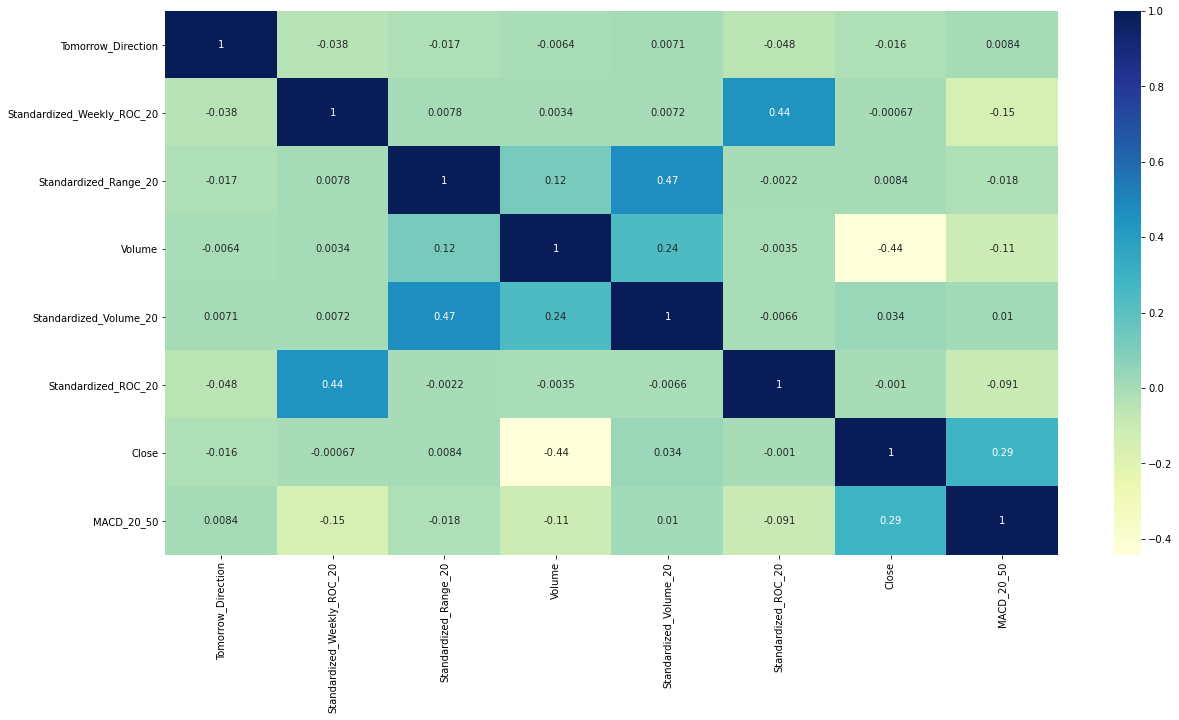

In [74]:
# Plotting correlations on a heatmap
plt.figure(figsize=(20,10))
cor = eur_usd_df_2.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Inference
For further developements we might consider swapping 'Volume', 'Standardized_ROC_20', 'Standardized_Volume_20'or 'Standardized_Range_20' with other features as they are showing some degree of correlation.

In [75]:
# Putting feature variables to X
X_2 = eur_usd_df_2.drop('Tomorrow_Direction', axis=1)

# Putting response variable to y
y_2 = eur_usd_df_2['Tomorrow_Direction']

# Splitting the data into train and test dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=10)

##### Logistic Regression

In [76]:
# Grid search cross validation
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
grid_log_reg = GridSearchCV(LogisticRegression(random_state = 42),params,cv=10)
grid_log_reg.fit(X_train_2, y_train_2)
grid_log_reg.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [77]:
# Logistic regression best model
logmodel_2 = grid_log_reg.best_estimator_

# Calculating the accuracy of logistic regression model
print('Accuracy of logistic regression classifier on test set after removing some features: {:.3f}'.format(logmodel_2.score(X_test_2, y_test_2)))


Accuracy of logistic regression classifier on test set after removing some features: 0.526


#### Inference
1. The model performance improved.
2. We can observe the paramenters suggested by GridSearch changed due to the different features selected at this stage. 

##### Decision Tree model

In [78]:
# Grid search cross validation
params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
grid_DT = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, cv=5, verbose=True)
grid_DT.fit(X_train_2, y_train_2)
grid_DT.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.8s finished


{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto'}

In [79]:
# Decision Tree best model
DT_2 = grid_DT.best_estimator_

# Calculating the accuracy of Decision Tree model
print('Accuracy of Decision Tree model on test set after removing some features: {:.3f}'.format(DT_2.score(X_test_2, y_test_2)))



Accuracy of Decision Tree model on test set after removing some features: 0.500


#### Inference
1. The performance of this model degraded.
2. Even in this instance a parameter change was suggested.

##### Random Forest Model

In [89]:
# Grid search cross validation
params = { 
    'n_estimators': [10, 100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}
grid_RF = GridSearchCV(RandomForestClassifier(random_state = 42), params, cv=5, verbose=True)
grid_RF.fit(X_train_2, y_train_2)
grid_RF.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  5.4min finished


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [90]:
# Random Forest best Model
RF_2 = grid_RF.best_estimator_

# Calculating the accuracy of Random Forest Model
print('Accuracy of Random Forest Model on test set after removing some features: {:.3f}'.format(RF_2.score(X_test_2, y_test_2)))

Accuracy of Random Forest Model on test set after removing some features: 0.508


#### Inference
1. The performance of this model degraded.
2. Once again a parameter change can be noticed.

#### SGD Model

In [91]:
# Grid search cross validation
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}
grid_SGD = GridSearchCV(SGDClassifier(max_iter=1000, random_state = 42), params, cv=5, verbose=True)
grid_SGD.fit(X_train_2, y_train_2)
grid_SGD.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    7.0s finished


{'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}

In [92]:
# SGD best Model
SGD_2 = grid_SGD.best_estimator_

# Calculating the accuracy of SGD Model
print('Accuracy of SGD Model on test set after removing some features: {:.3f}'.format(SGD_2.score(X_test_2, y_test_2)))

Accuracy of SGD Model on test set after removing some features: 0.530


#### Inference
1. The performance of this model improved.
2. Even in this instance a parameter change can be noticed.

#### SVM Model

In [93]:
# Grid search cross validation
params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','logistic']} 
grid_SVM = GridSearchCV(SVC(random_state = 42), params, verbose=True, cv=5)
grid_SVM.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   51.6s finished


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'logistic']},
             verbose=True)

In [94]:
grid_SVM.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [95]:
# SVM best Model
SVM_2 = grid_SVM.best_estimator_

# Calculating the accuracy of SVM Model
print('Accuracy of SVM Model on test set after removing some features: {:.3f}'.format(SVM_2.score(X_test_2, y_test_2)))

Accuracy of SVM Model on test set after removing some features: 0.526


#### Inference
1. The performance of this model improved significantly.
2. Another parameter change was suggested to better adapt to the new dataset.

In [96]:
# Comparing accuracy of different models
acc_2 = pd.Series(["{:.3f}".format(logmodel_2.score(X_test_2, y_test_2)), 
                "{:.3f}".format(DT_2.score(X_test_2, y_test_2)), 
                "{:.3f}".format(RF_2.score(X_test_2, y_test_2)), 
                "{:.3f}".format(SGD_2.score(X_test_2, y_test_2)), 
                "{:.3f}".format(SVM_2.score(X_test_2, y_test_2))])

models_comparison_df["Accuracy Score after removing some feautres"] = acc_2

### Step 9: Showing accuracy for each model built

In [97]:
models_comparison_df

,Model,Accuracy Score,Accuracy Score after Tuning,Accuracy Score after removing some feautres
0,Logistic Regression,0.516,0.506,0.526
1,Decision Tree,0.516,0.514,0.500
2,Random Forest,0.530,0.530,0.508
3,SGD,0.509,0.516,0.530
4,SVM,0.515,0.505,0.526
